置入库

In [1]:
#Import
import numpy as np
import pandas as pd
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import linearmodels as plm
from matplotlib import pyplot as plt
import matplotlib as mpl
import scipy
import scipy.stats as stats
import sklearn.cluster as sklc
import sklearn.metrics as sklm
import geopandas as gpd
import seaborn as sn
from scipy.stats import pearsonr
from matplotlib.offsetbox import AnchoredOffsetbox, TextArea, HPacker
from adjustText import adjust_text
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

色板准备

In [2]:
from matplotlib.colors import ListedColormap
cmap = mpl.cm.OrRd_r
newcolors = cmap(np.linspace(0,1,256))
mycmap = ListedColormap(newcolors[50:200])
levels = np.arange(0,300+20,20)

导入回归数据

In [3]:
#Province Data
AUSARH = pd.read_csv('https://raw.githubusercontent.com/XianlaiYin/Data/main/CASA0007/province/AUSARH.csv',index_col=0).T
GDR = pd.read_csv('https://raw.githubusercontent.com/XianlaiYin/Data/main/CASA0007/province/GDR.csv',index_col=0).T
HIR = pd.read_csv('https://raw.githubusercontent.com/XianlaiYin/Data/main/CASA0007/province/HIR.csv',index_col=0).T
NPGR = pd.read_csv('https://raw.githubusercontent.com/XianlaiYin/Data/main/CASA0007/province/NPGR.csv',index_col=0).T
SARH = pd.read_csv('https://raw.githubusercontent.com/XianlaiYin/Data/main/CASA0007/province/SARH.csv',index_col=0).T
SPRH = pd.read_csv('https://raw.githubusercontent.com/XianlaiYin/Data/main/CASA0007/province/SPRH.csv',index_col=0).T
DPI = pd.read_csv('https://raw.githubusercontent.com/XianlaiYin/Data/main/CASA0007/province/DPI.csv',index_col=0).T
UP = pd.read_csv('https://raw.githubusercontent.com/XianlaiYin/Data/main/CASA0007/province/UP.csv',index_col=0).T
UPC = pd.read_csv('https://raw.githubusercontent.com/XianlaiYin/Data/main/CASA0007/province/UPC.csv',index_col=0).T
UPCR = pd.read_csv('https://raw.githubusercontent.com/XianlaiYin/Data/main/CASA0007/province/UPCR.csv',index_col=0).T
HPT = pd.read_csv('https://raw.githubusercontent.com/XianlaiYin/Data/main/CASA0007/province/HPG.csv',index_col=0).T
EDU = pd.read_csv('https://raw.githubusercontent.com/XianlaiYin/Data/main/CASA0007/data_clean/EDU.csv',index_col=0).T
FS = pd.read_csv('https://raw.githubusercontent.com/XianlaiYin/Data/main/CASA0007/data_clean/FAM.csv',index_col=0).T
GDP = pd.read_csv('https://raw.githubusercontent.com/XianlaiYin/Data/main/CASA0007/data_clean/GDP.csv',index_col=0).T
GEN = pd.read_csv('https://raw.githubusercontent.com/XianlaiYin/Data/main/CASA0007/data_clean/GEN.csv',index_col=0).T
POP = pd.read_csv('https://raw.githubusercontent.com/XianlaiYin/Data/main/CASA0007/data_clean/POP.csv',index_col=0).T
UR = pd.read_csv('https://raw.githubusercontent.com/XianlaiYin/Data/main/CASA0007/data_clean/URB.csv',index_col=0).T
URC = pd.read_csv('https://raw.githubusercontent.com/XianlaiYin/Data/main/CASA0007/data_clean/URBC.csv',index_col=0).T
URCI = pd.read_csv('https://raw.githubusercontent.com/XianlaiYin/Data/main/CASA0007/data_clean/URCI.csv',index_col=0).T
GRD = pd.read_csv('https://raw.githubusercontent.com/XianlaiYin/Data/main/CASA0007/data_clean/GRD.csv',index_col=0).T

#Create Dataset
AUSARH['province'] = AUSARH.index.str.replace(" ", "")
GDR['province'] = GDR.index.str.replace(" ", "")
HIR['province'] = HIR.index.str.replace(" ", "")
NPGR['province'] = NPGR.index.str.replace(" ", "")
SARH['province'] = SARH.index.str.replace(" ", "")
SPRH['province'] = SPRH.index.str.replace(" ", "")
UP['province'] = UP.index.str.replace(" ", "")
EDU['province'] = EDU.index.str.replace(" ", "")
FS['province'] = FS.index.str.replace(" ", "")
GDP['province'] = GDP.index.str.replace(" ", "")
GEN['province'] = GEN.index.str.replace(" ", "")
POP['province'] = POP.index.str.replace(" ", "")
UR['province'] = UR.index.str.replace(" ", "")
URC['province'] = URC.index.str.replace(" ", "")
DPI['province'] = DPI.index.str.replace(" ", "")
HPT['province'] = HPT.index.str.replace(" ", "")
GRD['province'] = GRD.index.str.replace(" ", "")
UPC['province'] = UPC.index.str.replace(" ", "")
UPCR['province'] = UPCR.index.str.replace(" ", "")
URCI['province'] = URCI.index.str.replace(" ", "")

melted_AUSARH = pd.melt(AUSARH, id_vars=['province'], value_vars=[2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021])
melted_GDR = pd.melt(GDR, id_vars=['province'], value_vars=[2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021])
melted_HIR = pd.melt(HIR, id_vars=['province'], value_vars=[2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021])
melted_NPGR = pd.melt(NPGR, id_vars=['province'], value_vars=[2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021])
melted_SARH = pd.melt(SARH, id_vars=['province'], value_vars=[2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021])
melted_SPRH = pd.melt(SPRH, id_vars=['province'], value_vars=[2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021])
melted_UP = pd.melt(UP, id_vars=['province'], value_vars=[2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021])
melted_EDU = pd.melt(EDU, id_vars=['province'], value_vars=[2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021])
melted_FS = pd.melt(FS, id_vars=['province'], value_vars=[2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021])
melted_GDP = pd.melt(GDP, id_vars=['province'], value_vars=[2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021])
melted_GEN = pd.melt(GEN, id_vars=['province'], value_vars=[2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021])
melted_POP = pd.melt(POP, id_vars=['province'], value_vars=[2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021])
melted_UR = pd.melt(UR, id_vars=['province'], value_vars=[2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021])
melted_URC = pd.melt(URC, id_vars=['province'], value_vars=[2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021])
melted_DPI = pd.melt(DPI, id_vars=['province'], value_vars=[2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021])
melted_HPT = pd.melt(HPT, id_vars=['province'], value_vars=[2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021])
melted_GRD = pd.melt(GRD, id_vars=['province'], value_vars=[2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021])
melted_UPC = pd.melt(UPC, id_vars=['province'], value_vars=[2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021])
melted_UPCR = pd.melt(UPCR, id_vars=['province'], value_vars=[2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021])
melted_URCI = pd.melt(URCI, id_vars=['province'], value_vars=[2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021])

panel = pd.DataFrame({'province': melted_AUSARH['province'], 'year': melted_AUSARH['Year'], 'AUSARH': melted_AUSARH['value'], 'GDR': melted_GDR['value'], 'HIR': melted_HIR['value'], 'NPGR': melted_NPGR['value'], 'SARH': melted_SARH['value'], 'SPRH': melted_SPRH['value'], 'UP': melted_UP['value'], 'EDU': melted_EDU['value'], 'FS': melted_FS['value'], 'GDP': melted_GDP['value'], 'GEN': melted_GEN['value'], 'POP': melted_POP['value'], 'UR': melted_UR['value'], 'URC': melted_URC['value'], 'DPI': melted_DPI['value'], 'HPT': melted_HPT['value'], 'GRD': melted_GRD['value'], 'UPC': melted_UPC['value'], 'UPCR': melted_UPCR['value'], 'URCI': melted_URCI['value']})
panel['AUlnSARH'] = np.log(panel['AUSARH'])
panel['lnSARH'] = np.log(panel['SARH'])
panel['SPRH_log'] = np.log(panel['SPRH'])
panel['DPI_log'] = np.log(panel['DPI'])
panel['HIR_log'] = np.log(panel['HIR'])
panel['UR'] = panel['UR']/100
panel['EDU'] = panel['EDU']/100
panel['GDR'] = panel['GDR']/100
panel['GRD'] = panel['GRD']/100

store = panel
panel = panel[['province','year','lnSARH','FS','GDR','GRD','UR','EDU','HPT']]

多重共线性检验

In [4]:
#Def VIF
def drop_column_using_vif_(df, thresh=5):
    while True:
        df_with_const = add_constant(df)
        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()
        vif_df = vif_df.drop('const')
        if vif_df.VIF.max() > thresh:
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            break
    return df

#VIF
vifcontent = panel[['FS','GDR','GRD','UR','EDU','HPT']]
vifresult = drop_column_using_vif_(vifcontent)
print(vifresult)

       FS    GDR     GRD      UR     EDU       HPT
0    2.87  0.286  0.1229  0.8015  0.2049  0.941130
1    3.07  0.339  0.0130  0.7327  0.1057  1.047158
2    3.52  0.405  0.0318  0.3045  0.0469  1.027341
3    3.61  0.437  0.0614  0.3773  0.0463  1.063751
4    3.14  0.363  0.0584  0.4448  0.0564  1.017004
..    ...    ...     ...     ...     ...       ...
615  2.69  0.452  0.0426  0.6363  0.2201  0.990334
616  3.00  0.475  0.0345  0.5333  0.1726  0.920116
617  3.00  0.440  0.0119  0.6094  0.1672  0.934191
618  2.78  0.430  0.0411  0.6607  0.2017  1.043922
619  2.97  0.423  0.0729  0.5724  0.1916  0.983719

[620 rows x 6 columns]


相关性检验

lnSARH ( r = 0.9999999999999999 )
FS ( r = -0.6023906096331739 )
GDR ( r = -0.03745525787820473 )
GRD ( r = -0.037739994820977944 )
UR ( r = 0.41836478563226764 )
EDU ( r = 0.20322678585289708 )
HPT ( r = -0.04615955596529911 )


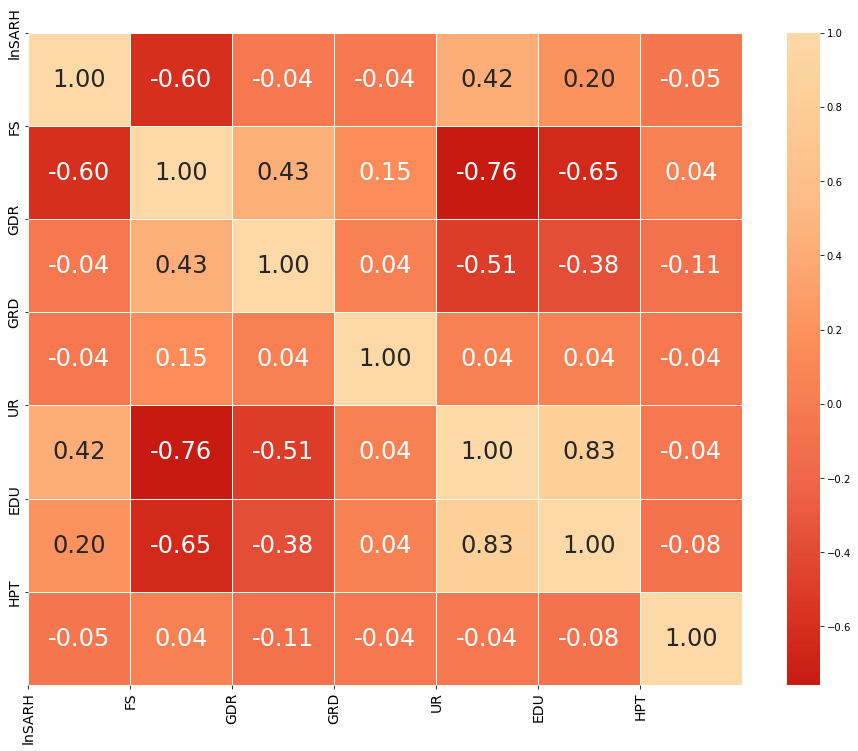

In [5]:
#Pearson Correlation Coefficient
corrcontent = panel[['lnSARH','FS','GDR','GRD','UR','EDU','HPT']]
for i in range(len(corrcontent.columns)):
    pearson = pearsonr(corrcontent[corrcontent.columns[i]], corrcontent['lnSARH'])
    print(corrcontent.columns[i],"( r =",pearson[0],")")

#Checking the Correlation Between Variables
f = plt.figure(figsize=(16, 12))
sn.heatmap(corrcontent.corr(),annot=True,cmap = mycmap,linewidths=.5,fmt= '.2f',annot_kws={"size": 24})
plt.xticks(range(corrcontent.shape[1]), corrcontent.columns, fontsize=14, rotation=90)
plt.yticks(range(corrcontent.shape[1]), corrcontent.columns, fontsize=14)
plt.show()

回归方法尝试：混合OLS、固定效应模型、随机效应模型

In [6]:
#混合OLS
ols_y = panel['lnSARH']
ols_x = panel[['FS','GDR','UR','EDU','HPT']]
olsresult = sm.OLS(endog = ols_y, exog = sm.add_constant(ols_x)).fit()
olsresult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lnSARH   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     132.3
Date:                Tue, 17 Jan 2023   Prob (F-statistic):           5.16e-95
Time:                        11:28:54   Log-Likelihood:                -787.85
No. Observations:                 620   AIC:                             1588.
Df Residuals:                     614   BIC:                             1614.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.0401      0.747     14.773      0.000       9.573      12.508
FS            -2.1143      0.126    -16.810      0.000      -2.361      -1.867
GDR            5.4218      0.577      9.394      0.000       4.288       6.555
UR             4.0055      0.497      8.057      0.000       3.029       4.982
EDU           -9.3464      0.846    -11.045      0.000     -11.008      -7.685
HPT           -0.0523      0.374     -0.140      0.889      -0.787       0.683
==============================================================================
Omnibus:                        8.321   Durbin-Watson:                   1.401
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                7.698
Skew:                          -0.223   Prob(JB):                       0.0213
Kurtosis:                       2.685   Cond. No.                         99.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
#基于plm建立数据集
regcontent = panel
regcontent = panel.set_index(['province','year'], drop=False)
reg_x = regcontent[['FS','GDR','EDU','UR','HPT']]
reg_y = regcontent['lnSARH']
#固定效应模型
reg_fe = plm.PanelOLS(reg_y,reg_x, entity_effects = True, time_effects = False)
results_fe = reg_fe.fit(cov_type = 'clustered', cluster_entity = True)
print(results_fe)

                          PanelOLS Estimation Summary                           
Dep. Variable:                 lnSARH   R-squared:                        0.7855
Estimator:                   PanelOLS   R-squared (Between):              0.5701
No. Observations:                 620   R-squared (Within):               0.7855
Date:                Tue, Jan 17 2023   R-squared (Overall):              0.5716
Time:                        11:28:54   Log-likelihood                   -136.55
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      427.65
Entities:                          31   P-value                           0.0000
Avg Obs:                       20.000   Distribution:                   F(5,584)
Min Obs:                       20.000                                           
Max Obs:                       20.000   F-statistic (robust):             104.74
                            

In [8]:
#随机效应模型
reg_re = plm.RandomEffects.from_formula(formula = "lnSARH ~ FS + GDR + EDU + UR + HPT + EntityEffects", data = regcontent)
results_re = reg_re.fit()
print(results_re)

                        RandomEffects Estimation Summary                        
Dep. Variable:                 lnSARH   R-squared:                        0.8669
Estimator:              RandomEffects   R-squared (Between):              0.9623
No. Observations:                 620   R-squared (Within):               0.7428
Date:                Tue, Jan 17 2023   R-squared (Overall):              0.9607
Time:                        11:28:54   Log-likelihood                   -246.89
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      801.37
Entities:                          31   P-value                           0.0000
Avg Obs:                       20.000   Distribution:                   F(5,615)
Min Obs:                       20.000                                           
Max Obs:                       20.000   F-statistic (robust):             801.37
                            

豪斯曼检验：选择固定效应或随机效应模型

In [9]:
#Hausman test
b_fe = results_fe.params
b_re = results_re.params
b_diff = b_fe - b_re
v_fe = results_fe.cov
v_re = results_re.cov
v_diff = v_fe - v_re
df = len(b_fe)

table = pd.DataFrame({'FE':b_fe,'RE':b_re,'Difference':b_diff,'sqrt(diag(v_fe-v_re))':np.sqrt(np.diag(v_diff))})
chi2 = np.dot(b_diff.T,  np.linalg.inv(v_diff).dot(b_diff))
pval = 1 - stats.chi2.cdf(chi2, df)

print(table)
print()
print(f'chi-Squared: {chi2:.2f}')
print(f'degrees of freedom: {df}')
print(f'p-Value:{pval:.5f}')

           FE         RE  Difference  sqrt(diag(v_fe-v_re))
EDU -4.040892  -3.543532   -0.497360               0.537308
FS  -0.306838   0.373682   -0.680519               0.092837
GDR -2.908226  -1.610128   -1.298098               0.527343
HPT  0.477276   1.226320   -0.749045               0.223378
UR   8.901067  10.441324   -1.540257               0.461280

chi-Squared: 102.98
degrees of freedom: 5
p-Value:0.00000


最终回归模型：单因素固定效应模型

In [10]:
#单因素固定效应模型-删除GRD，保留个体效应，最终模型
regcontent = panel
regcontent = regcontent.set_index(['province', 'year'])

reg_x = regcontent[['FS','GDR','EDU','UR','HPT']]
reg_y = regcontent['lnSARH']

reg = plm.PanelOLS(reg_y,reg_x, entity_effects = True, time_effects = False)
regresult = reg.fit(cov_type='clustered', cluster_entity = True)
print(regresult)

                          PanelOLS Estimation Summary                           
Dep. Variable:                 lnSARH   R-squared:                        0.7855
Estimator:                   PanelOLS   R-squared (Between):              0.5701
No. Observations:                 620   R-squared (Within):               0.7855
Date:                Tue, Jan 17 2023   R-squared (Overall):              0.5716
Time:                        11:28:55   Log-likelihood                   -136.55
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      427.65
Entities:                          31   P-value                           0.0000
Avg Obs:                       20.000   Distribution:                   F(5,584)
Min Obs:                       20.000                                           
Max Obs:                       20.000   F-statistic (robust):             104.74
                            

残差检验

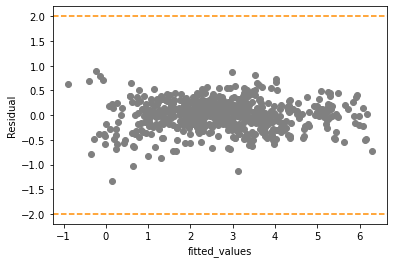

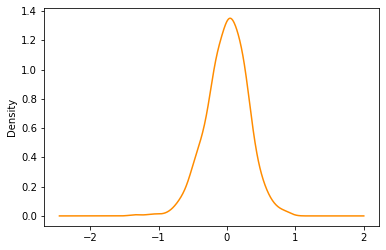

KstestResult(statistic=0.27578147582450163, pvalue=3.588970246195766e-42)
NormaltestResult(statistic=21.09301871808056, pvalue=2.6285072668993568e-05)
(210.9027701468957, 1.6990128756626658e-44, 63.41045315164537, 2.4468956748618e-53)


In [11]:
#检验数据准备
reg_x = regcontent[['FS','GDR','EDU','UR','HPT']]
reg_y = regcontent['lnSARH']
fitted_values = regresult.fitted_values

#残差检验
plt.scatter(fitted_values, regresult.resids,color='grey')
plt.xlabel('fitted_values')
plt.ylabel('Residual')
plt.axhline(y=2, color='darkorange', linestyle='--')
plt.axhline(y=-2, color='darkorange', linestyle='--') 
plt.show()

#残差正态性检验
plt.figure()
regresult.resids.plot.density(color='darkorange')
plt.show()
kstest = scipy.stats.kstest(regresult.resids,cdf = "norm")
normaltest = scipy.stats.normaltest(regresult.resids)
print(kstest)
print(normaltest)

#残差方差齐性检验
#第一个值为LM统计量；第二个值是统计量对应的概率p值；第三个值为F统计量，用于检验残差平方项与自变量之间是否独立，如果独立则表明残差方差齐性；第四个值则为F统计量的概率p值，同样大于0.05，则进一步表示残差项满足方差齐性的假设。
BP_test = statsmodels.stats.diagnostic.het_breuschpagan(exog_het = reg_x, resid = regresult.resids)
print(BP_test)

时间序列预测

In [12]:
#Read data
UR = pd.read_csv('https://raw.githubusercontent.com/XianlaiYin/Data/main/CASA0007/data_clean/URB.csv',index_col=0)
EDU = pd.read_csv('https://raw.githubusercontent.com/XianlaiYin/Data/main/CASA0007/data_clean/EDU.csv',index_col=0)
GDR = pd.read_csv('https://raw.githubusercontent.com/XianlaiYin/Data/main/CASA0007/province/GDR.csv',index_col=0)
FS = pd.read_csv('https://raw.githubusercontent.com/XianlaiYin/Data/main/CASA0007/data_clean/FAM.csv',index_col=0)
HPT = pd.read_csv('https://raw.githubusercontent.com/XianlaiYin/Data/main/CASA0007/province/HPG.csv',index_col=0)

UR = UR.reindex(index=UR.index[::-1])
UR = UR/100
EDU = EDU.reindex(index=EDU.index[::-1])
EDU =EDU/100
GDR = GDR.reindex(index=GDR.index[::-1])
GDR = GDR/100
FS = FS.reindex(index=FS.index[::-1])
HPT = HPT.reindex(index=HPT.index[::-1])

模型平稳性测试

In [13]:
#ADF Test
for province in UR.columns:
    series = UR[province]
    adfullerresult = adfuller(series)
    print(province + " KPSS Test Statistic: {:.3f}".format(adfullerresult[0]))
    print(province + " p-value: {:.3f}".format(adfullerresult[1]))

#KPSS Test
for province in UR.columns:
    series = UR[province]
    kpssresult = kpss(series)
    print(province + ' ADF Statistic: %f' % kpssresult[0])
    print(province + ' p-value: %f' % kpssresult[1])

Beijing KPSS Test Statistic: -6.038
Beijing p-value: 0.000
Tianjin KPSS Test Statistic: -8.545
Tianjin p-value: 0.000
Hebei KPSS Test Statistic: 1.495
Hebei p-value: 0.998
Shanxi KPSS Test Statistic: -0.263
Shanxi p-value: 0.931
InnerMongolia KPSS Test Statistic: -1.499
InnerMongolia p-value: 0.534
Liaoning KPSS Test Statistic: -0.559
Liaoning p-value: 0.880
Jilin KPSS Test Statistic: 0.481
Jilin p-value: 0.984
Heilongjiang KPSS Test Statistic: 0.707
Heilongjiang p-value: 0.990
Shanghai KPSS Test Statistic: -3.140
Shanghai p-value: 0.024
Jiangsu KPSS Test Statistic: -1.651
Jiangsu p-value: 0.457
Zhejiang KPSS Test Statistic: -0.604
Zhejiang p-value: 0.870
Anhui KPSS Test Statistic: -7.832
Anhui p-value: 0.000
Fujian KPSS Test Statistic: 0.538
Fujian p-value: 0.986
Jiangxi KPSS Test Statistic: -1.882
Jiangxi p-value: 0.341
Shandong KPSS Test Statistic: 0.635
Shandong p-value: 0.988
Henan KPSS Test Statistic: -23.926
Henan p-value: 0.000
Hubei KPSS Test Statistic: -0.436
Hubei p-value: 0

自动ARIMA预测

In [14]:
#ARIMA Prediction
#UR Prediction
URP = pd.DataFrame({'province': ['2022','2023','2024','2025','2026','2027']})
for province in UR.columns:
    series = UR[province]
    model = auto_arima(series)
    model.fit(series)
    forecasts = model.predict(n_periods=6)
    URP[province] = forecasts.values

#EDU Prediction
EDUP = pd.DataFrame({'province': ['2022','2023','2024','2025','2026','2027']})
for province in EDU.columns:
    series = EDU[province]
    model = auto_arima(series)
    model.fit(series)
    forecasts = model.predict(n_periods=6)
    EDUP[province] = forecasts.values

#GDR Prediction
GDRP = pd.DataFrame({'province': ['2022','2023','2024','2025','2026','2027']})
for province in GDR.columns:
    series = GDR[province]
    model = auto_arima(series)
    model.fit(series)
    forecasts = model.predict(n_periods=6)
    GDRP[province] = forecasts.values

    
#FS Prediction
FSP = pd.DataFrame({'province': ['2022','2023','2024','2025','2026','2027']})
for province in FS.columns:
    series = FS[province]
    model = auto_arima(series)
    model.fit(series)
    forecasts = model.predict(n_periods=6)
    FSP[province] = forecasts.values
    
#HPT Prediction
HPTP = pd.DataFrame({'province': ['2022','2023','2024','2025','2026','2027']})
for province in HPT.columns:
    series = HPT[province]
    model = auto_arima(series)
    model.fit(series)
    forecasts = model.predict(n_periods=6)
    HPTP[province] = forecasts.values

URP = URP.T
URP.columns = URP.iloc[0]
URP = URP[1:]
URP['CODE'] = URP.index

EDUP = EDUP.T
EDUP.columns = EDUP.iloc[0]
EDUP = EDUP[1:]
EDUP['CODE'] = EDUP.index

GDRP = GDRP.T
GDRP.columns = GDRP.iloc[0]
GDRP = GDRP[1:]
GDRP['CODE'] = GDRP.index

FSP = FSP.T
FSP.columns = FSP.iloc[0]
FSP = FSP[1:]
FSP['CODE'] = FSP.index

HPTP = HPTP.T
HPTP.columns = HPTP.iloc[0]
HPTP = HPTP[1:]
HPTP['CODE'] = HPTP.index

melted_URP = pd.melt(URP, id_vars=['CODE'], value_vars=['2022','2023','2024','2025','2026','2027'])
melted_EDUP = pd.melt(EDUP, id_vars=['CODE'], value_vars=['2022','2023','2024','2025','2026','2027'])
melted_GDRP = pd.melt(GDRP, id_vars=['CODE'], value_vars=['2022','2023','2024','2025','2026','2027'])
melted_FSP = pd.melt(FSP, id_vars=['CODE'], value_vars=['2022','2023','2024','2025','2026','2027'])
melted_HPTP = pd.melt(HPTP, id_vars=['CODE'], value_vars=['2022','2023','2024','2025','2026','2027'])
predictcontent = pd.DataFrame({'province': melted_URP['CODE'], 'year': melted_URP['province'], 'UR': melted_URP['value'], 'EDU': melted_EDUP['value'], 'GDR': melted_GDRP['value'], 'FS': melted_FSP['value'], 'HPT': melted_HPTP['value']})

房价变动指数计算

In [15]:
predictcontent['year'] = pd.to_numeric(predictcontent['year'])
precontent = predictcontent.set_index(['province','year'], drop=False)
pre_x = precontent[['FS','GDR','EDU','UR','HPT']]

predictresult = regresult.predict(pre_x)
predictresult['predict_area'] = np.exp(predictresult['predictions'])

In [16]:
calculate = predictresult.reset_index()
calculate = calculate[['province','year','predict_area']]
calculate = calculate.pivot(index='province', columns='year', values='predict_area')
calculate['R2222'] = 1
calculate['R2223'] = calculate[2023]/calculate[2022]
calculate['R2224'] = calculate[2024]/calculate[2022]
calculate['R2225'] = calculate[2025]/calculate[2022]
calculate['R2226'] = calculate[2026]/calculate[2022]
calculate['R2227'] = calculate[2027]/calculate[2022]
changeindex = pd.DataFrame({'province': calculate.index, 'R2223': calculate['R2223'], 'R2227': calculate['R2227']})
changeindex = changeindex.reset_index(drop=True)
changeindex.drop(['province'], axis=1, inplace=True)

房价比例走势图

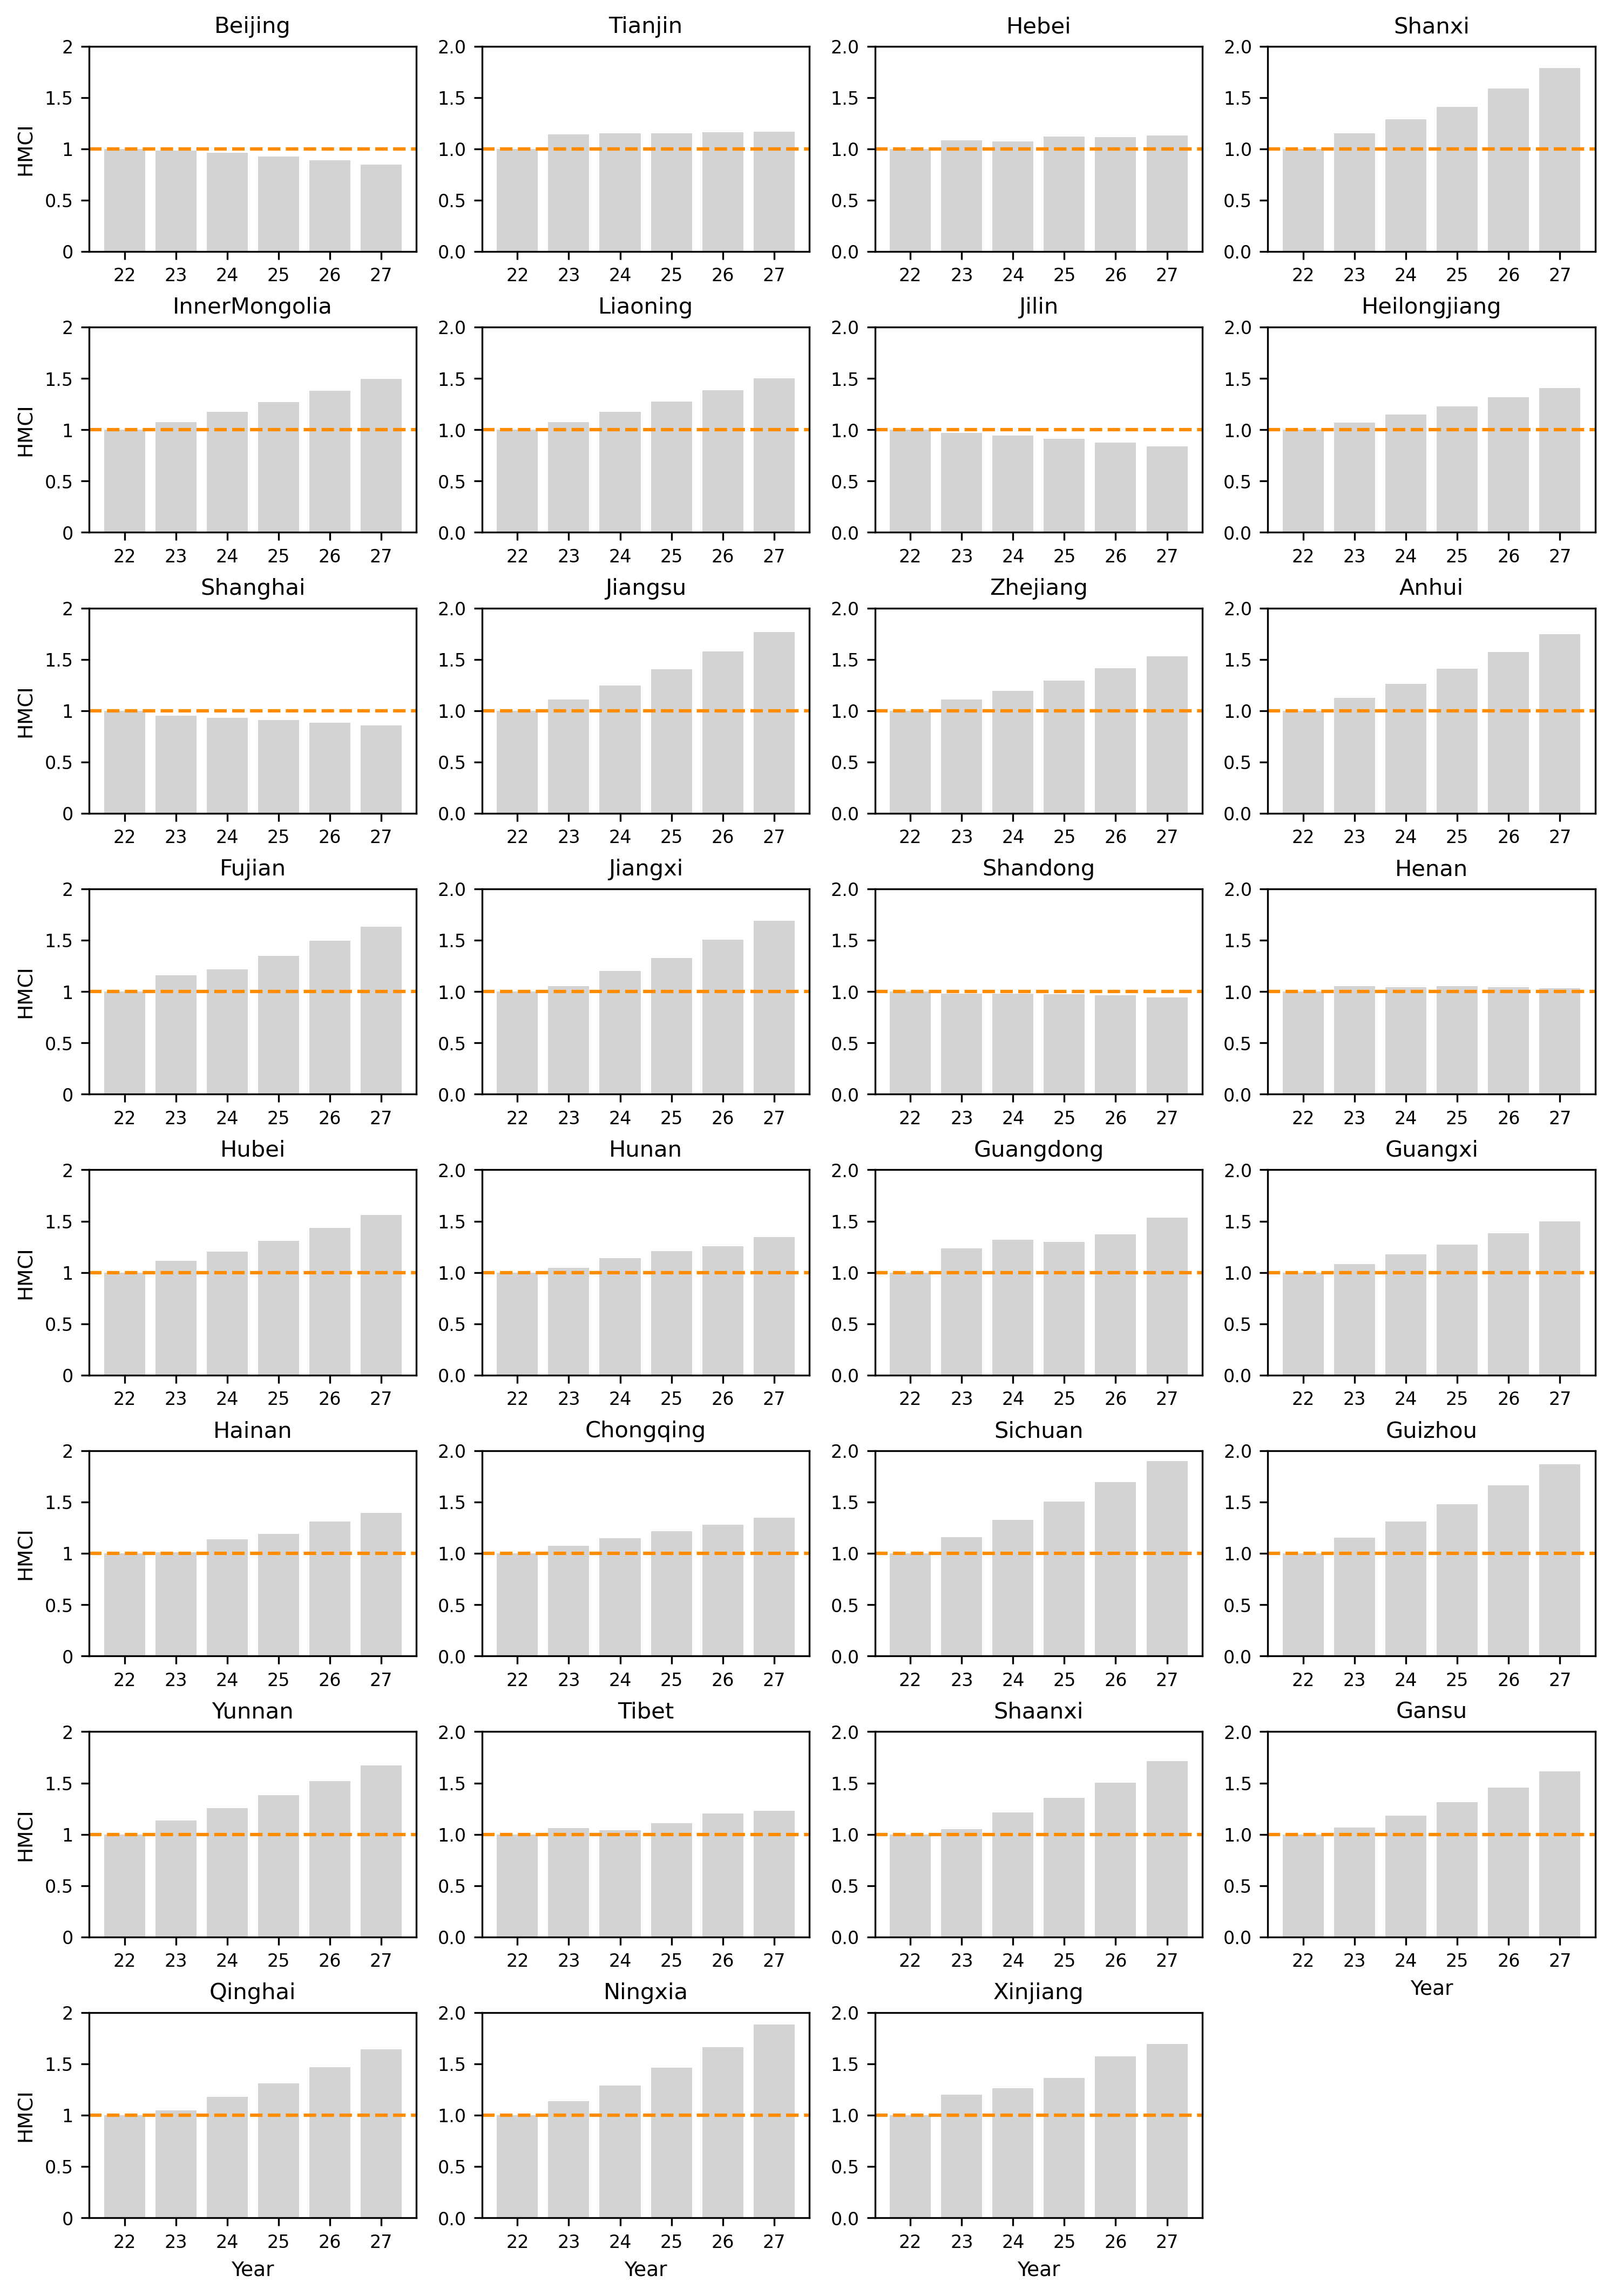

In [17]:
output = pd.DataFrame({'2022': calculate['R2222'], '2023': calculate['R2223'], '2024': calculate['R2224'], '2025': calculate['R2225'], '2026': calculate['R2226'], '2027': calculate['R2227']}).T

fig, axes = plt.subplots(8,4, figsize=(12,18), dpi=300)
axes_list = []

for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        axes_list.append(axes[i, j])
for p, ax in zip(predictcontent['province'], axes_list):
    x = output.index
    y = output[p]
    ax.set_aspect(2)
    ax.bar(x,y,color='lightgrey')
    ax.set_title(p, fontsize=10)
    ax.set_ylim(0, 2)
    ax.set_yticks([0, 0.5, 1, 1.5, 2])
    ax.set_xticklabels(['22', '23', '24', '25', '26', '27'])
    ax.tick_params(axis='both', labelsize=8)
    ax.axhline(y=1, color='darkorange', linestyle='--')
for i in [0,4,8,12,16,20,24,28]:
    axes_list[i].set_yticklabels(['0', '0.5', '1', '1.5', '2'], fontsize=8)
    axes_list[i].set_ylabel('HMCI', fontsize=9)
for i in [27,28,29,30]:
    axes_list[i].set_xlabel('Year', fontsize=9)
plt.delaxes(ax)

聚类近期（2023）和远期（2027）以判断危险指数

[3 4 2 0 0 0 2 3 2 1 2 1 0 2 2 3 0 4 2 3 0 0 4 4 3 3 1 1 0 0 0]


c:\Users\xianl\AppData\Local\ESRI\conda\envs\arcpy\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


For n_clusters = 3 The average silhouette_score is : 0.6880843447872037
For n_clusters = 4 The average silhouette_score is : 0.8511209564049309
For n_clusters = 5 The average silhouette_score is : 0.9470682827046238


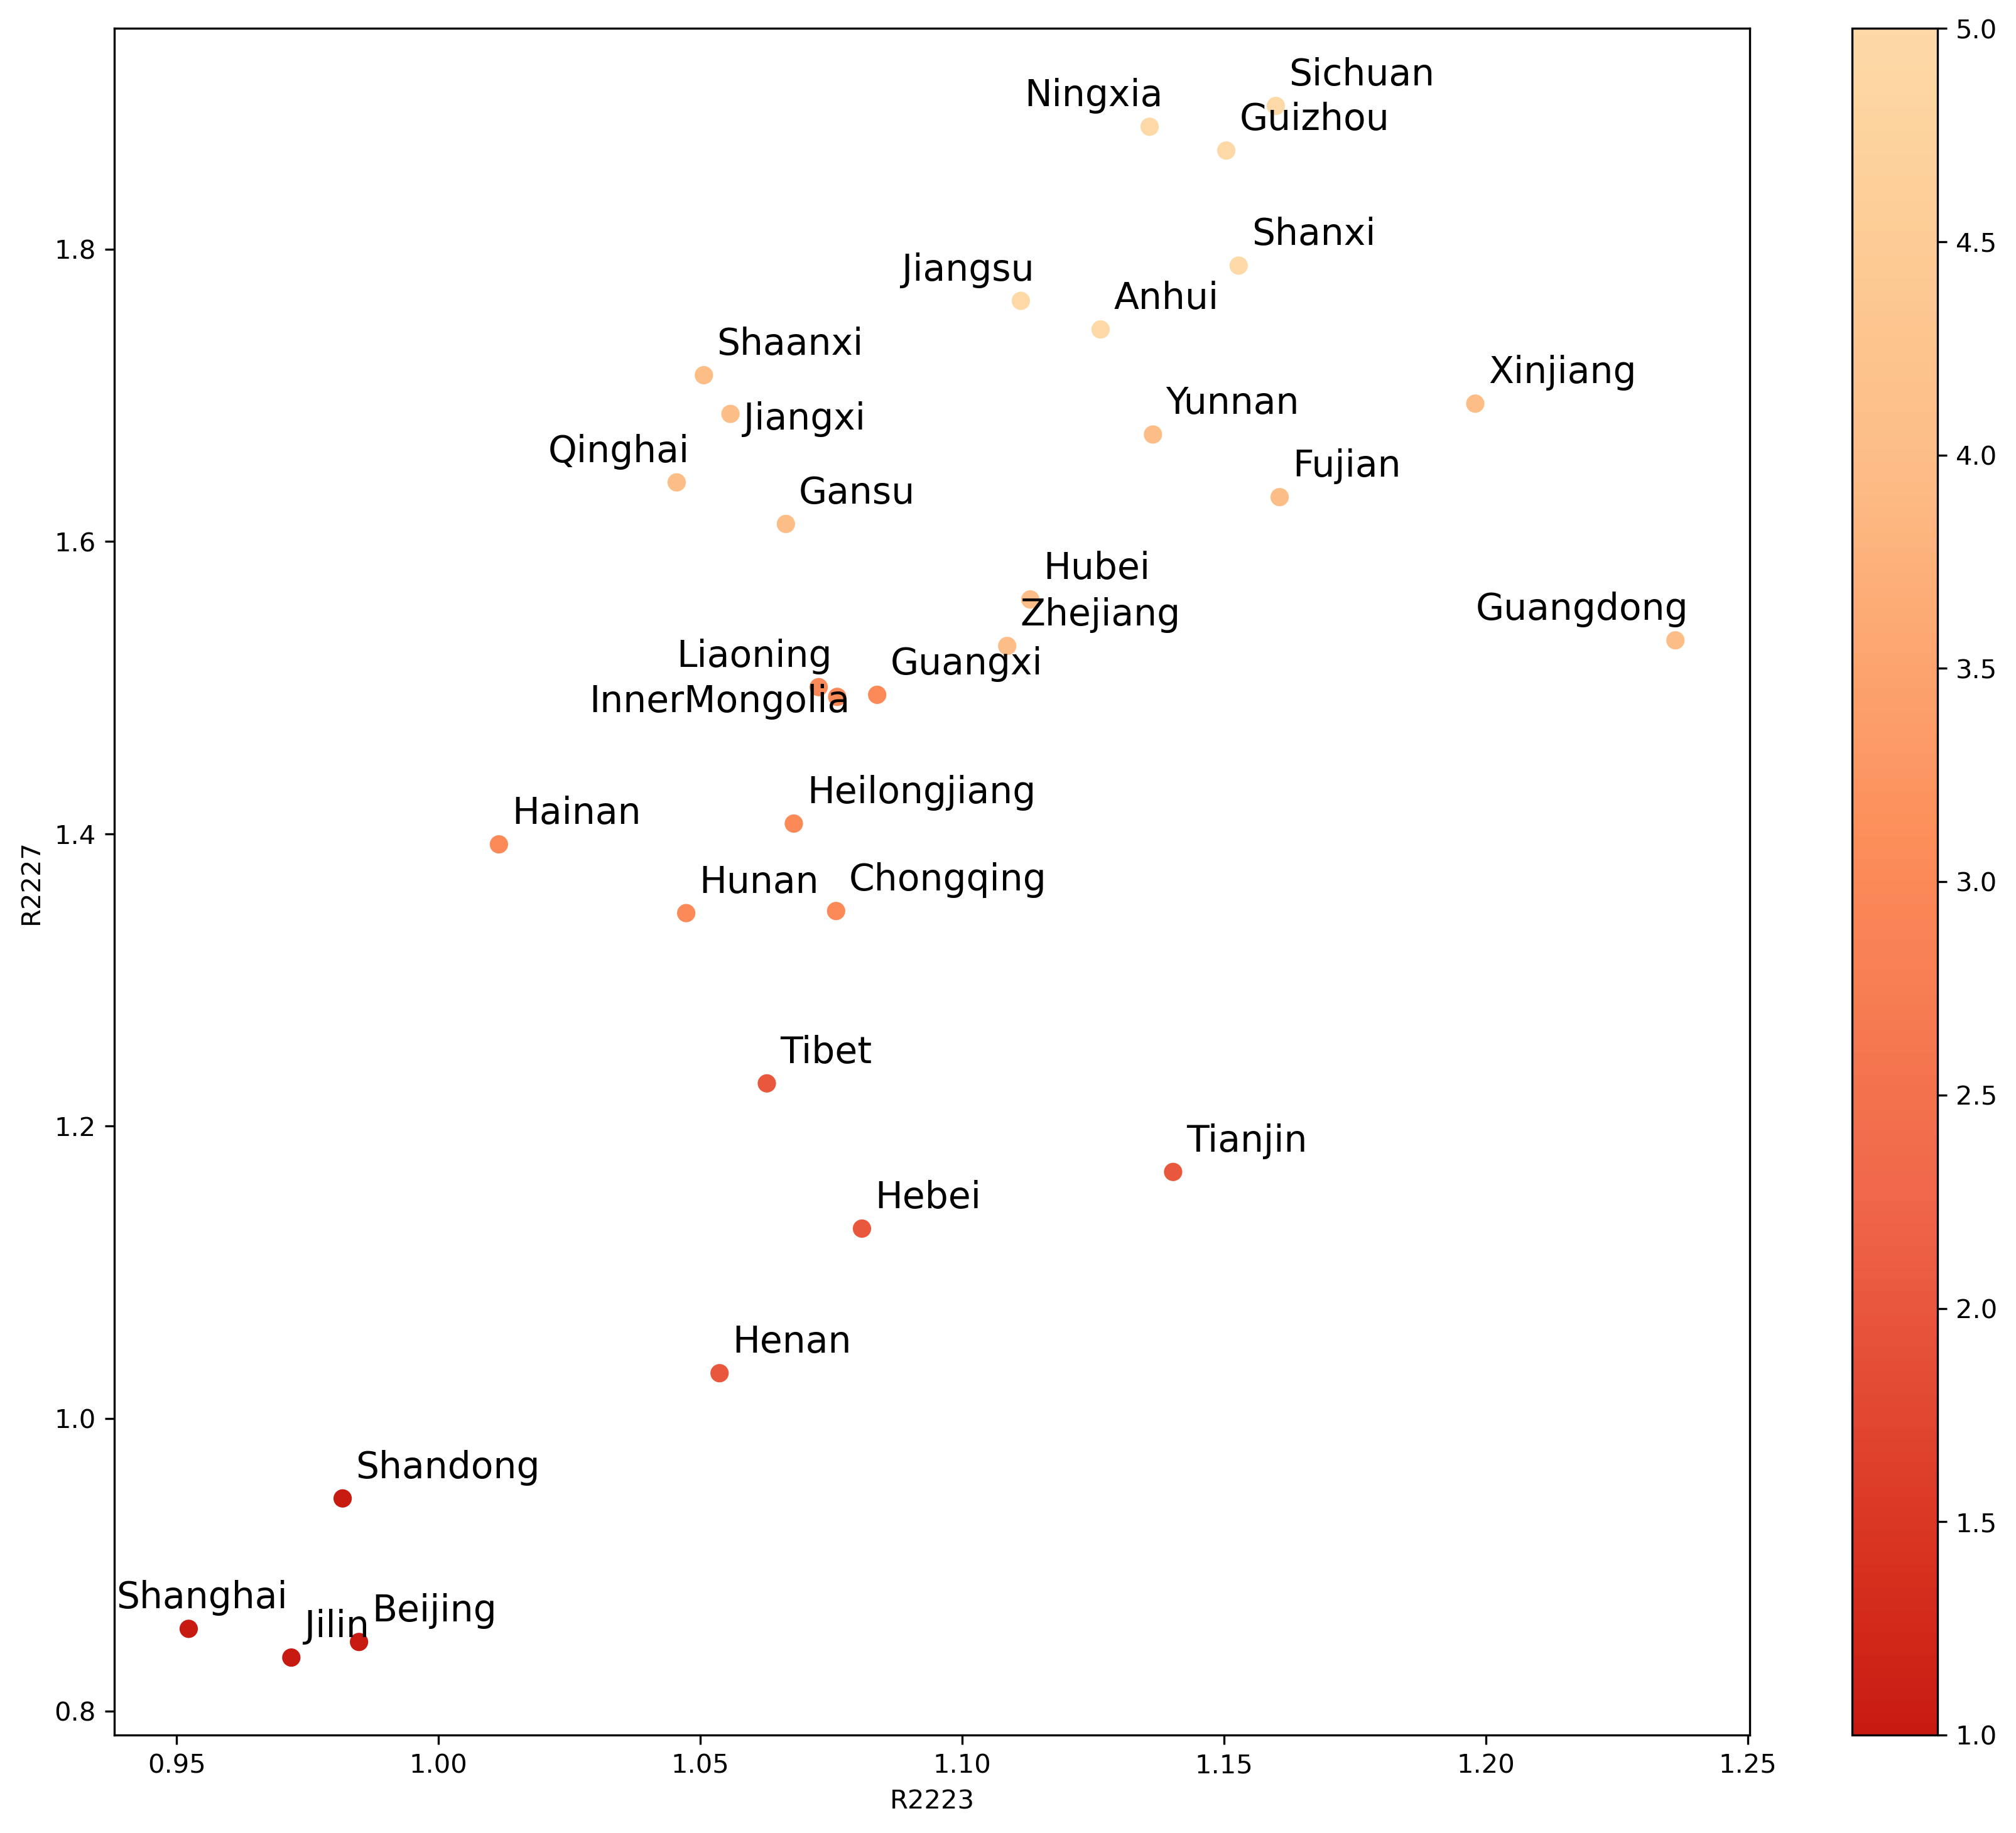

In [18]:
#Clustering
num_clusters = 5
random_state_seed = 100
kmeans_output = sklc.KMeans(n_clusters = num_clusters, random_state = random_state_seed).fit(changeindex)
clustering_ids_kmeans = kmeans_output.labels_
print(clustering_ids_kmeans)
clustercontent = changeindex.assign(cluster_id = clustering_ids_kmeans)

#Plot the Result of Clustering
fig, ax = plt.subplots(figsize = (14,12), dpi=300)
#Number of Clusters
n_clusters = clustercontent.cluster_id.nunique()
#Merge data
response_dic = {2:3,
                0:4,
                1:2,
                4:1,
                3:5}
clustercontent['id'] = 0
for i in range(len(clustercontent)):
    clustercontent['id'].iloc[i] = response_dic[clustercontent['cluster_id'].iloc[i]]
clusterprovince = pd.DataFrame({'province': calculate.index, 'cluster_id': clustercontent['id'], 'R2223': clustercontent['R2223'], 'R2227': clustercontent['R2227']})
#Scatter Points
scatter = ax.scatter(clusterprovince.R2223, clusterprovince.R2227, c = clusterprovince.cluster_id, cmap = mycmap)
ax.set_xlabel('R2223')
ax.set_ylabel('R2227')
#ax.set_title('Clustering result')
texts = []
for i, point in clusterprovince.iterrows():
    text = ax.annotate(s=point['province'], xy=(point.R2223, point.R2227), xytext=(5,5),textcoords='offset points', fontsize=14)
    texts.append(text)
adjust_text(texts)
#Add Colorbar
cbar = plt.colorbar(scatter)

#Calculate the Silhouette_Score When num_cluster = 3,4,5
silhouette_kmeans = sklm.silhouette_score(clustercontent,clustering_ids_kmeans) #(data points,labels of clusters)
df_silhouette_score = pd.DataFrame({'n_cluster':[3,4,5], 'silhouette_score':[0,0,0]})
for index, row in df_silhouette_score.iterrows():
    n_clusters = row['n_cluster']
    clusterer = sklc.KMeans(n_clusters = n_clusters, random_state = random_state_seed).fit(clustercontent)
    cluster_labels = clusterer.labels_
    # The silhouette_score Gives the Average Value for All the Samples.
    # This Gives a Perspective Into the Density and Separation of the Formed Clusters
    silhouette_avg = sklm.silhouette_score(clustercontent, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    row['silhouette_score'] = silhouette_avg


空间化呈现

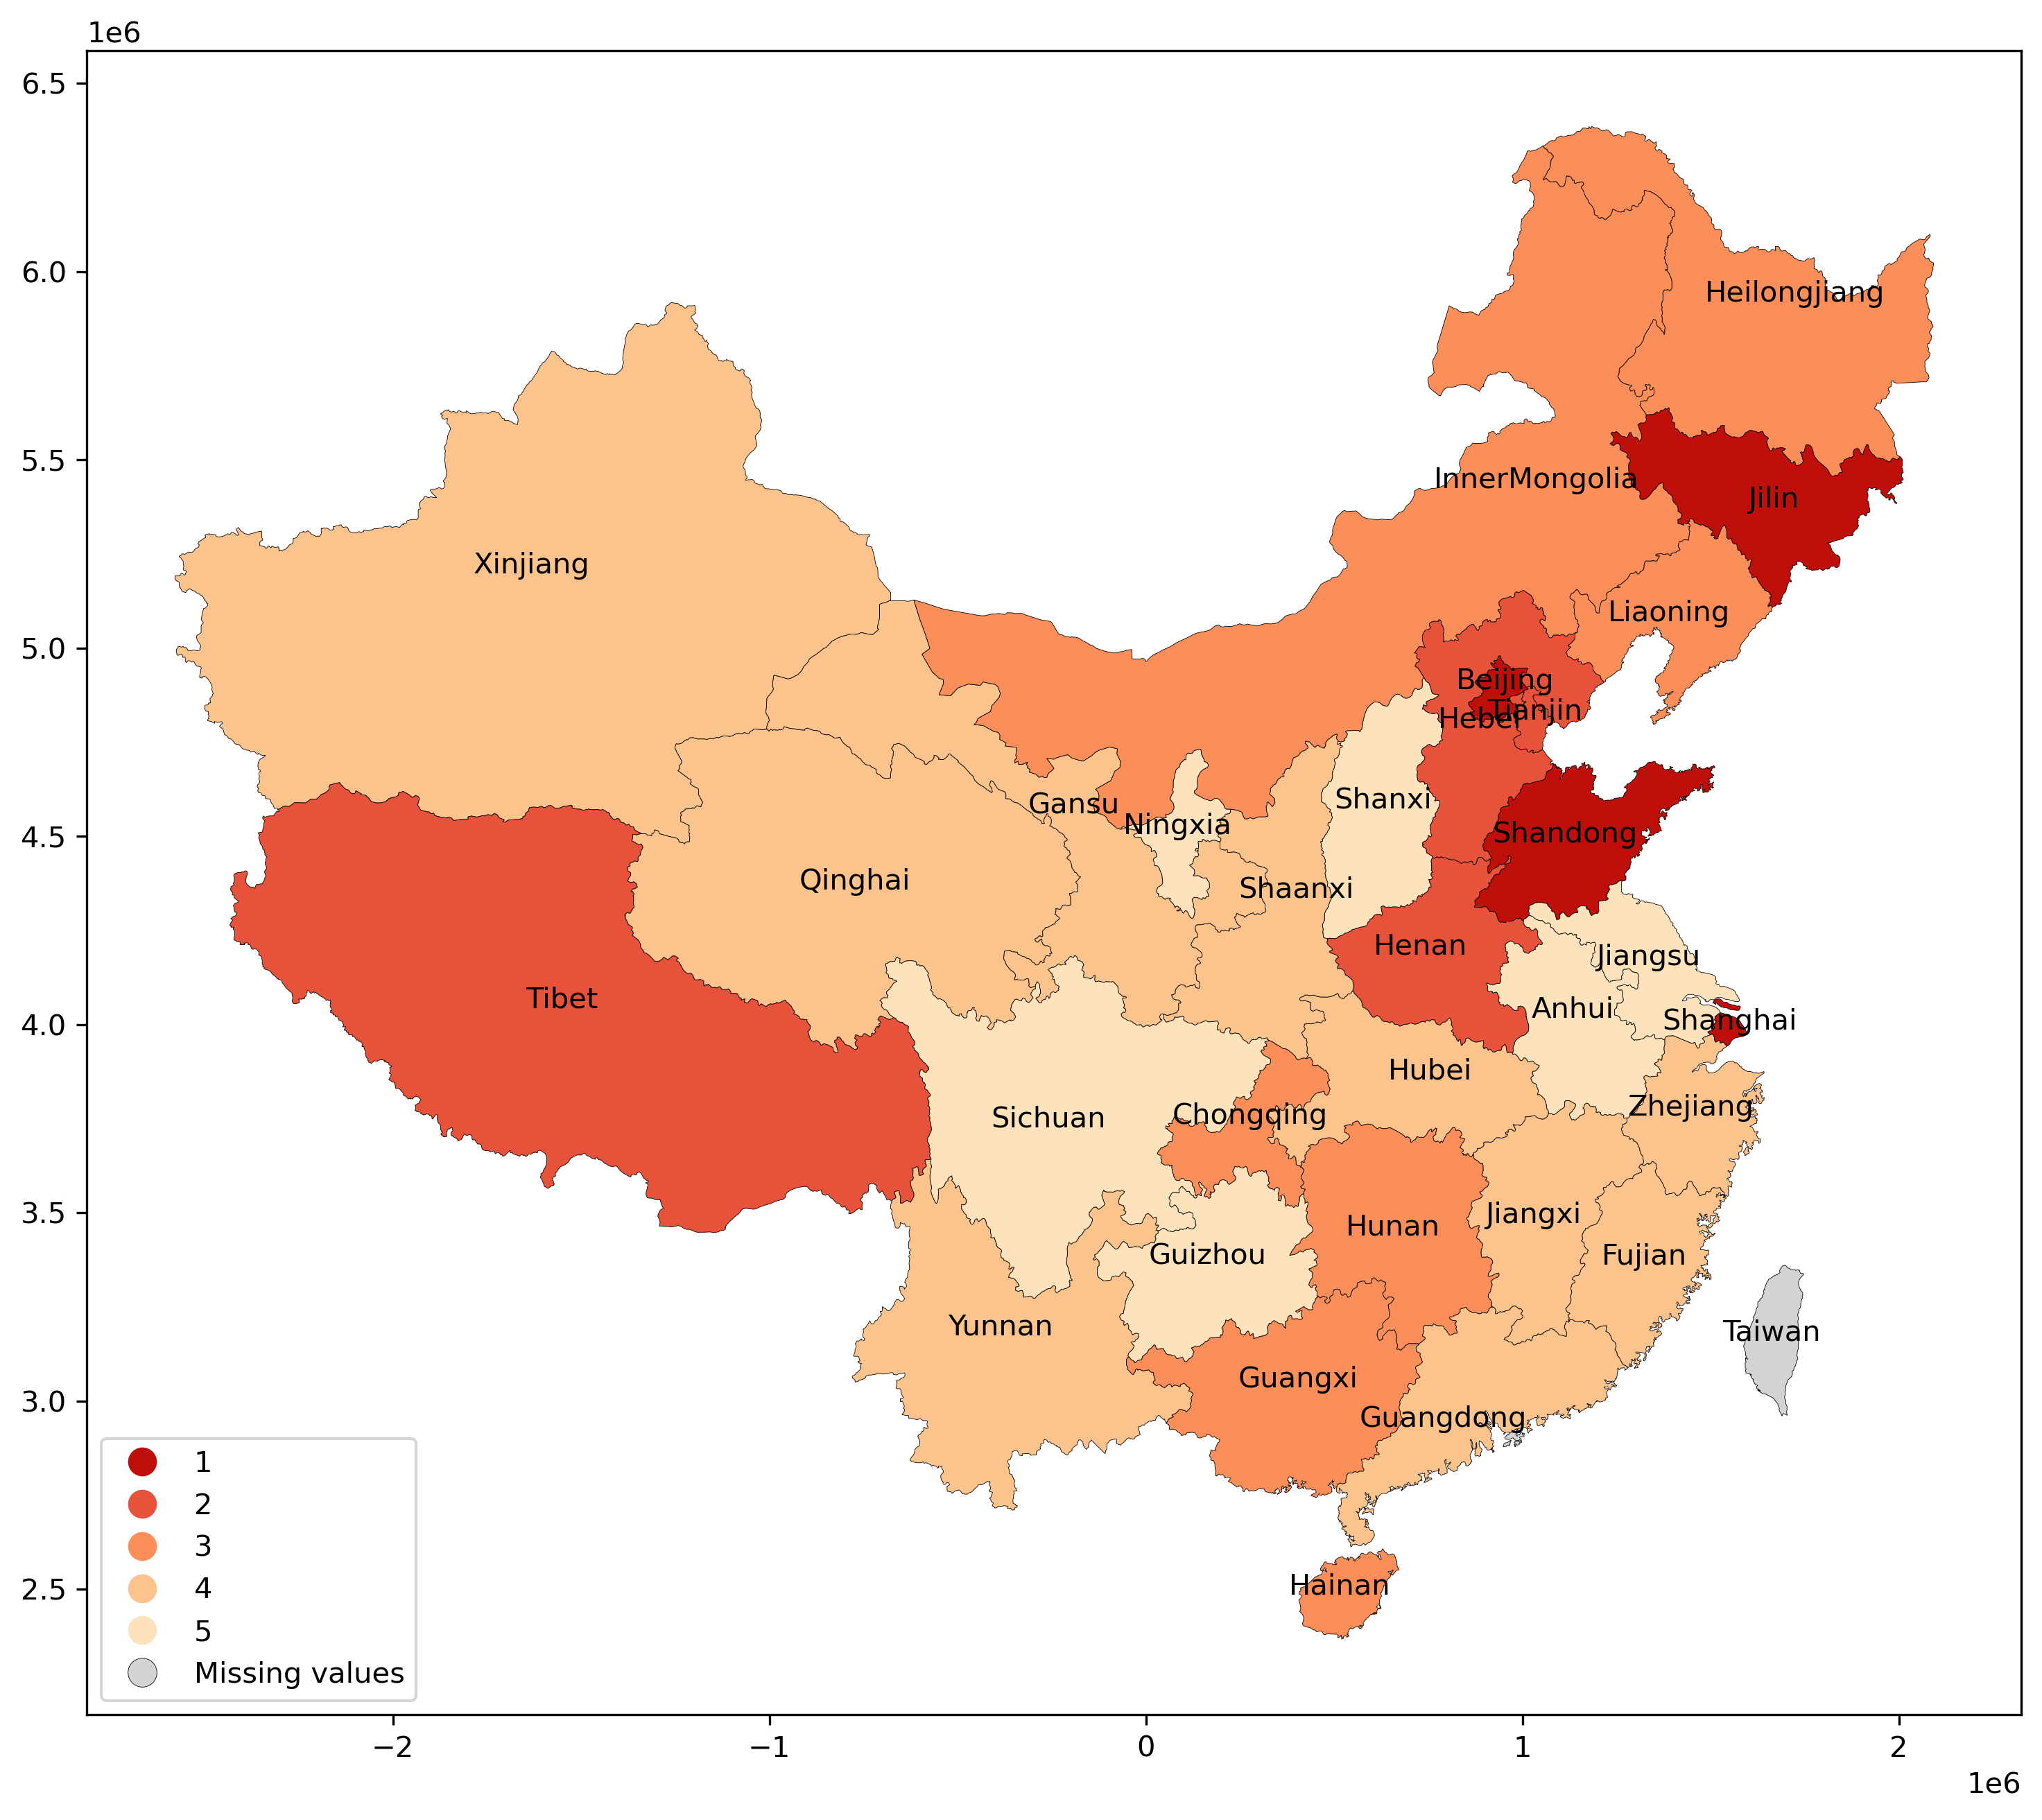

In [19]:
na = pd.DataFrame({'province': ['Hongkong', 'Macau', 'Taiwan'], 'cluster_id': [None,None,None], 'R2223': [None,None,None], 'R2227': [None,None,None]})
clusterprovinceGAT = pd.concat([clusterprovince, na], axis=0, ignore_index=True)
china = gpd.read_file(r'D:\UCL_DATA\CASA0007\china\china.shp')
chinamerge = china.merge(clusterprovinceGAT, on='province')

fig, ax = plt.subplots(figsize = (12,12), dpi=300)
ax = chinamerge.plot(column = 'cluster_id',
                     missing_kwds = {'color': 'lightgrey', 'label': 'Missing values'}, 
                     ax = ax, 
                     legend = True, 
                     legend_kwds = {'loc': 'lower left'},
                     cmap = 'OrRd_r', 
                     vmin = -1,
                     vmax = 5,
                     edgecolor = 'black', 
                     linewidth = 0.2, 
                     categorical = True)
#ax.set_title('Clustering Result')

chinamerge = chinamerge.drop(chinamerge[chinamerge['province']=='Hongkong'].index)
chinamerge = chinamerge.drop(chinamerge[chinamerge['province']=='Macau'].index)

for i, row in chinamerge.iterrows():
    ax.annotate(s=row['province'], xy=row.geometry.representative_point().coords[0], ha='center', fontsize=10)